<a href="https://colab.research.google.com/github/harshitadd/Celestini/blob/master/Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
!pip install rawpy  ##tells collab that this is a cmd - whatever cmd , just prefix  !
import numpy as np 
import cv2 
import rawpy 
import imageio
from sklearn.linear_model import LinearRegression 
import os 
import math
import matplotlib.pyplot as plt 
import csv
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [88]:
from google.colab import drive 
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/RAW/'  #change dir to your project folder


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [89]:
##UPLOAD AIRVEDA CSV FIRST 
temp = os.listdir('/content/gdrive/My Drive/RAW/RAW_Batch1/')
jpg_names=[]
name_jpg=[]
dummy=[]
origin_time={}           #storing original timestamps 
#loading .jpg file names (ONLY Names) from RAW_Batch1
for name in temp: 
    path = '/content/gdrive/My Drive/RAW/RAW_Batch1/' + str(name)
    if(name.endswith('.jpg')):
      try: 
        name_jpg.append(path)
        dummy=name.split('_')
        k=str(dummy[1])+str(dummy[2])+str(dummy[3])+str(dummy[4])+str(dummy[5])
        jpg_names.append(k)
        origin_time[path]=k
      except: 
        print(name)



713
713
713


In [90]:
#Opening AirVeda csv 

temp={}
with open('/content/airveda.csv', mode ='r') as csv_file: 
      csv_reader=csv.reader(csv_file)
      for row in csv_reader: 
        temp[row[0]]=row[2]
stamp={}
for iter in temp: 
  try: 
    k=iter.split(':')
    stamp[(str(k[0])+ str(k[1]))]=temp[iter]
  except: 
    pass 
  
y={}
for stp in stamp: 
    x=stp.split('-')
    y[(str(x[0])+str(x[1])+str(x[2]))]=stamp[stp]

    
final_av={}
for ctr in y:
  z=ctr.split(' ')
  final_av[(str(z[0])+str(z[1]))]=y[ctr]
  

  
print(len(final_av))

2800


In [0]:
def transmission(img, lt = 230, retMean = False):
  ker = np.ones((3, 3))/9.0
  imgrgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  b, g, r = cv2.split(img)
  hsv = cv2.cvtColor(imgrgb, cv2.COLOR_RGB2HSV)
  _, _, v = cv2.split(hsv)
  v_blur = cv2.filter2D(v, -1, ker)
  _,building_mask = cv2.threshold(v_blur, lt, 255, cv2.THRESH_BINARY)
  sky = cv2.bitwise_and(imgrgb, imgrgb, mask = building_mask)
  sky_mask = cv2.bitwise_not(building_mask, building_mask.copy())
  building = cv2.bitwise_and(imgrgb, imgrgb, mask = sky_mask)
  #f, ax = plt.subplots(2, 1, figsize = (15, 15))
  #ax[0].imshow(imgrgb)
  #ax[1].imshow(sky)
  #ax[2].imshow(building)
  al = max(v_blur.flatten())
  #Airlight Found. Now calculate Transmission Map
  img_norm = img/float(al)
  b, g, r = cv2.split(img_norm)
  kernel = np.ones((3,3),np.uint8)
  im_new = np.zeros((img.shape[0], img.shape[1]))
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      im_new[i][j] = min(b[i][j], g[i][j], r[i][j])
  dcp = cv2.erode(im_new, kernel, iterations = 1)
  #ax[3].imshow(im_new, cmap = 'gray')
  #ax[4].imshow(dcp, cmap = 'gray')
  tr = np.ones((dcp.shape[0], dcp.shape[1]))
  for i in range(dcp.shape[0]):
    for j in range(dcp.shape[1]):
      tr[i][j] = 1 - dcp[i][j]
  #ax[1].imshow(tr, cmap = 'gray')
  if retMean == False:
    return tr
  elif retMean == True:
    return np.mean(tr)

['201906141845', '201906141842', '201906141830', '201906141835', '201906141856', '201906121903', '201906141850', '201906121905', '201906121855', '201906121806', '201906111909', '201906121722', '201906121801', '201906111900', '201906121750', '201906111828', '201906121755', '201906121742', '201906121745', '201906121735', '201906150948', '201906150942', '201906150937', '201906150932', '201906150927', '201906150922', '201906150917', '201906150912', '201906150907', '201906150902', '201906150857', '201906150852', '201906150847', '201906150842', '201906150838', '201906150833', '201906150827', '201906150822', '201906150817', '201906150812', '201906150807', '201906150802', '201906150800', '201906150622', '201906150620', '201906150616', '201906150615', '201906150611', '201906150605', '201906150603', '201906141827', '201906141821', '201906141815', '201906141810', '201906141805', '201906141804', '201906141803', '201906141758', '201906141753', '201906141750', '201906141744', '201906141738', '201906

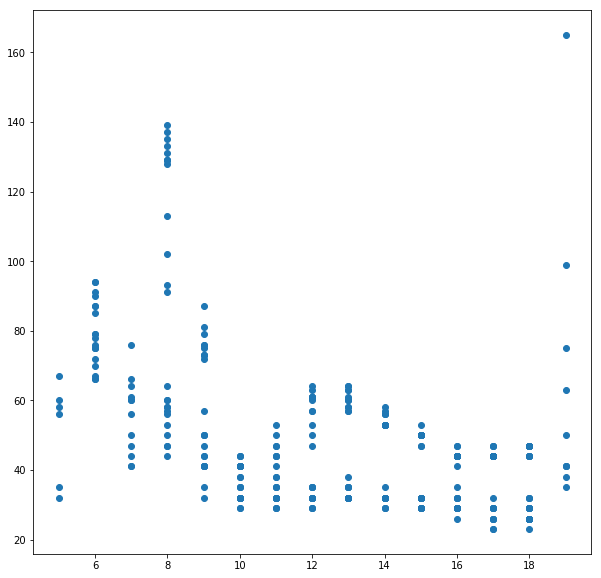

In [92]:
#Matching airveda data with jpeg names to getting matching timestamps 

match={}
for name in jpg_names:
  for stmp in final_av: 
    if(stmp==name and stmp not in match):
      match[stmp]=final_av[stmp]
      
#print((match))

      

timestamps=[]

for key in match:
  timestamps.append(str(key))
  
print(timestamps)
print(len(timestamps))

hours=[]
for stamp in timestamps: 
    hours.append(stamp[8:-2])

print(hours)
print(len(hours))
hours = np.array(hours, dtype=np.int32)

pm=[]
for p in match:
  pm.append(match[p])

print(pm)
print(len(pm))
pm=np.array(pm, dtype=np.int32)
#Plotting time against pm 

f,ax = plt.subplots(1,1,figsize=(10,10))
ax.scatter(hours,pm)


In [93]:
#Matching matched timestamps to the images that should be read 
crspond={}
for key in match: 
  for val in origin_time: 
    if(origin_time[val]==key):
      value=[]
      value.append(match[key])
      value.append(key)
      crspond[val]=value
      break
      

print(len(crspond))

trans_jpg=[]
entropy_jpg=[]
contrast_jpg=[]
images_jpg=[]
k=0
for key in crspond:
  try:
    read = cv2.imread(key)
    read = cv2.resize(read, (32, 32))
    images_jpg.append(read)
    k+=1
    print(k)
  except: 
    print(name)
    
    


322
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276


In [0]:
def contrast(image):
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  s = 0
  ss = 0
  mean = np.mean(image)
  x = (-1 * mean * (np.ones(image.shape)))
  ss = np.square(np.add(image, x))
  cont = np.sqrt(np.sum(ss)/float(image.size))
  return cont

In [0]:
def entropy(image):
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  hist = cv2.calcHist( [image.astype('float32')],
              [0], 
              None,
               [256], 
              [0,256] )
  h_norm = 0
  h_norm = cv2.normalize(hist, h_norm)
  ent = 0
  for p in h_norm:
    try:
      ent += p*math.log(p, 2)
    except:
      pass
  return (-1 * ent[0])

In [0]:
def transmission(img, lt = 230, retMean = False):
  ker = np.ones((3, 3))/9.0
  imgrgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  b, g, r = cv2.split(img)
  hsv = cv2.cvtColor(imgrgb, cv2.COLOR_RGB2HSV)
  _, _, v = cv2.split(hsv)
  v_blur = cv2.filter2D(v, -1, ker)
  _,building_mask = cv2.threshold(v_blur, lt, 255, cv2.THRESH_BINARY)
  sky = cv2.bitwise_and(imgrgb, imgrgb, mask = building_mask)
  sky_mask = cv2.bitwise_not(building_mask, building_mask.copy())
  building = cv2.bitwise_and(imgrgb, imgrgb, mask = sky_mask)
  #f, ax = plt.subplots(2, 1, figsize = (15, 15))
  #ax[0].imshow(imgrgb)
  #ax[1].imshow(sky)
  #ax[2].imshow(building)
  al = max(v_blur.flatten())
  #Airlight Found. Now calculate Transmission Map
  img_norm = img/float(al)
  b, g, r = cv2.split(img_norm)
  kernel = np.ones((3,3),np.uint8)
  im_new = np.zeros((img.shape[0], img.shape[1]))
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      im_new[i][j] = min(b[i][j], g[i][j], r[i][j])
  dcp = cv2.erode(im_new, kernel, iterations = 1)
  #ax[3].imshow(im_new, cmap = 'gray')
  #ax[4].imshow(dcp, cmap = 'gray')
  tr = np.ones((dcp.shape[0], dcp.shape[1]))
  for i in range(dcp.shape[0]):
    for j in range(dcp.shape[1]):
      tr[i][j] = 1 - dcp[i][j]
  #ax[1].imshow(tr, cmap = 'gray')
  if retMean == False:
    return tr
  elif retMean == True:
    return np.mean(tr)

In [96]:
trans_jpg=[]
for img in images_jpg: 
  k=transmission(img, retMean= True)
  trans_jpg.append(k)
  print(k)

print(len(trans_jpg))



0.7324141855314961
0.7268344056372551
0.7314876045767716
0.7329388786764706
0.7463618259803922
0.5311954711294417
0.7343443627450982
0.5242125496031746
0.5162152300824177
0.702255667892157
0.7673828125000001
0.7372970281862745
0.7120978860294118
0.7578546262254903
0.7203967524509804
0.7146254595588235
0.7131433823529413
0.7234106924019608
0.7239736519607844
0.7290670955882355
0.6504360465116279
0.6496470040137615
0.652286044034091
0.6636008522727272
0.6599971719457014
0.6619282027714932
0.6612926136363636
0.6592940596846846
0.6642296593468469
0.661669481981982
0.6593520220588236
0.6639873798076923
0.6666024383408071
0.6684526715959821
0.66766357421875
0.6678597586495535
0.6709245954241072
0.6728862847222222
0.6797786458333334
0.6780226115088106
0.6768836805555556
0.6734538477422908
0.6733744123340708
0.6765515557650862
0.6906655521716102
0.7004276398689516
0.7071619709645669
0.7043564884538152
0.7042388303212851
0.7022425640060241
0.7255323223039216
0.7228209252450981
0.723238357843137

In [97]:
contrast_jpg=[]
for img in images_jpg: 
  k=contrast(img)
  print(k)
  contrast_jpg.append(k)

68.74766408940033
69.35324794229149
68.04237884488273
68.793765782524
68.52958894970106
49.95049672495523
69.15200733352297
46.432041016774164
36.851576371035655
68.63610724941553
67.12048526406629
66.80418310687652
69.47640030675856
70.74006204935102
68.6491686676878
65.04388530823793
70.048267154104
67.81975946902901
67.82565655332537
66.99707708103648
45.471917844973284
45.83292128406607
45.56446404011172
45.12792955013755
45.33098372630112
45.31882800936084
44.93224964056603
45.2443129090146
45.03723350443939
45.2198120814978
44.98243183948969
45.0449208905193
45.144613848336114
45.230261950041104
44.96654300960187
45.25255986344127
45.38229538459905
45.733160494782695
45.63849378688119
45.9179692484581
46.051795481699926
46.48606835109959
46.42467476726244
51.65272851515201
52.88007288917677
55.99272762488893
56.65060334385162
57.22086801572555
57.32285346775729
56.804783925559725
68.72146574017087
68.0604756021823
68.30728544835596
67.52234466314535
67.88491302095802
67.546664849

In [98]:
entropy_jpg=[]
for img in images_jpg: 
  k=entropy(img)
  print(k)
  entropy_jpg.append(k)

44.10022735595703
44.271400451660156
46.139366149902344
44.94213104248047
42.83098220825195
40.740386962890625
43.63808059692383
39.160587310791016
34.35586166381836
49.42927932739258
44.14805221557617
47.12425231933594
49.07419204711914
43.82481002807617
48.02400588989258
48.183197021484375
48.332366943359375
47.44825744628906
47.1584358215332
46.885108947753906
32.65132522583008
33.06986618041992
32.78559112548828
32.13936233520508
31.606647491455078
31.27797508239746
31.089693069458008
30.871431350708008
29.891847610473633
29.825166702270508
29.115140914916992
30.162673950195312
28.963382720947266
30.2132511138916
30.134254455566406
29.79147720336914
30.426549911499023
30.63282585144043
30.382909774780273
29.927322387695312
30.27965545654297
29.626358032226562
30.131555557250977
42.58699035644531
43.12390899658203
46.0837516784668
45.738502502441406
44.93294906616211
45.38649368286133
43.859092712402344
45.97398376464844
45.888465881347656
46.707923889160156
46.55141067504883
47.313

In [0]:
!pip install urlopen
import json 
import requests 
import urlopen
from pandas.io.json import json_normalize

with open('/content/weather_historic.json') as file: 
  data=json.load(file)
  store=data["data"]
  table=json_normalize(store['weather'])

  #print(json.dumps(data, indent =4))  
  index=table.index
  columns=table.columns 
  values=table.values

 

In [0]:
#!pip install pickle 
import pickle 
'''([int(year+month+day1+time[0:2]+"00"),float(hour["windspeedKmph"]),float(hour["tempC"]),float(hour["precipMM"]), float(hour["HeatIndexC"]), float(hour["humidity"]), float(hour["pressure"]), float(hour["visibility"]) ])'''

with open('/content/data (2).bin', 'rb') as file:
  atad = pickle.load(file)

# print(len(atad))
# print(atad)

#print(len(data))

windspeed=[]
temp=[]
prec=[]

humidity=[]
pressure=[]
visibility=[]


for e in atad:
  for j in e:
    windspeed.append(j[0])
    temp.append(j[1])
    prec.append(j[2])
    humidity.append(j[4])
    pressure.append(j[5])
    visibility.append(j[6])

    
# print(windspeed)
# print(visibility)


In [100]:
print(len(timestamps))
print(len(trans_jpg))
print(len(entropy_jpg))
print(len(contrast_jpg))
print(len(windspeed))
print(len(temp))
print(len(humidity))
print(len(pressure))
print(len(visibility))
print(len(prec))
#Mapping final timestamps to weather data 





322
322
322
322
322
322
322
322
322
322


In [0]:
#FEATURE FINETUNING 

#Converting timestamps to int 
hours=np.reshape(np.array(list(map(int,hours))), (322, 1))
transmission=np.reshape(np.array(list(map(float,trans_jpg))), (322, 1))
entropy=np.reshape(np.array(list(map(float,entropy_jpg))), (322, 1))
contrast=np.reshape(np.array(list(map(float,contrast_jpg))),(322,1))
windspeed=np.reshape(windspeed, (322,1))
temp=np.reshape(temp, (322,1))
humidity=np.reshape(humidity, (322,1))
pressure=np.reshape(pressure, (322,1))
visibility=np.reshape(visibility, (322,1))
prec=np.reshape(prec, (322,1))



In [137]:
#REGRESSION 
regr = LinearRegression()
labels = pm
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2, SelectKBest, f_classif
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics


#features = np.hstack((hours,transmission,entropy, contrast, windspeed, temp, humidity, pressure, visibility, prec)) - 18.59
#features = np.hstack((hours,entropy, contrast, windspeed, temp, humidity)) - 20.9
#features = np.hstack((hours,transmission,entropy, contrast)) - 18.45
#features = np.hstack((hours,entropy, contrast, windspeed, humidity)) - 20.8
#features = np.hstack((transmission,entropy, contrast))-19.97
#features = np.hstack((hours,transmission,entropy, contrast, windspeed, temp, humidity))-18.64


#SelectKBest
x_train, x_test, y_train, y_test = train_test_split(features,labels,test_size=0.3, random_state= 24)
model = regr.fit(x_train, y_train)  #method of LinearRegression which fits the model : y_train is the target value or the value that it should ideally come to  

pred = regr.predict(x_test)


#kfold 
# kf=KFold(n_splits=3)

#kf.get_n_splits(x_train)
# print(kf)



#leaveOneOut 

loo = LeaveOneOut()
loo.get_n_splits(x_train)
scores = cross_val_score(model, x_train, y_train, cv=7)
print(scores)
predictions = cross_val_predict(model, x_train, y_train, cv=6)

#print(mean_squared_error(pred, y_test)**0.5)
print(regr.score(x_train,y_train)) #printing R^2Score 




[0.29274759 0.33311275 0.12135266 0.56146669 0.28044342 0.27084276
 0.05596967]
0.3867555691994574


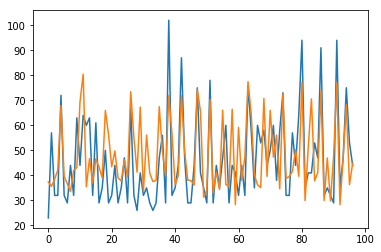

In [115]:
plt.plot(y_test)    #blue - ideal labels 
plt.plot(pred)      #orange - predicted   

In [0]:
|